In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
 
import csv
csv.register_dialect('myDialect', delimiter = ';')
csvfile = '/Users/akshayanagarajan/Downloads/student-mat-final.csv'
'''
with open('/Users/akshayanagarajan/Downloads/student-mat.csv', 'r') as f:
    with open(csvfile, "w") as output:
            reader = csv.reader(f, dialect='myDialect')
            writer = csv.writer(output, lineterminator='\n')
            for row in reader:
                writer.writerow(row)      
'''
df = pd.read_csv('/Users/akshayanagarajan/Downloads/student-mat-final.csv')
df['school'] = [1 if i=="GP" else 0 for i in df.school]
df['sex'] = [1 if i=="M" else 0 for i in df.sex]
df['address'] = [1 if i=="R" else 0 for i in df.address]
df['famsize'] = [1 if i=="GT3" else 0 for i in df.famsize]
df['Pstatus'] = [1 if i=="A" else 0 for i in df.Pstatus]
Mjob = []
for i in df.Mjob:
    if i == 'other':
        i = 1
    elif i == 'at_home':
        i = 2
    elif i == 'health':
        i = 3
    elif i == 'teacher':
        i = 4
    elif i == 'services':
        i = 5    
    Mjob.append(i)
df['Mjob'] = Mjob        
Fjob = []
for i in df.Fjob:
    if i == 'other':
        i = 1
    elif i == 'at_home':
        i = 2
    elif i == 'health':
        i = 3
    elif i == 'teacher':
        i = 4
    elif i == 'services':
        i = 5    
    Fjob.append(i)
df['Fjob'] = Fjob  
reason = []
for i in df.reason:
    if i == 'other':
        i = 1
    elif i == 'course':
        i = 2
    elif i == 'home':
        i = 3
    elif i == 'reputation':
        i = 4 
    reason.append(i)
df['reason'] = reason
df['guardian'] = [1 if i=="mother" else 0 for i in df.guardian]
df['schoolsup'] = [1 if i=="yes" else 0 for i in df.schoolsup]
df['famsup'] = [1 if i=="yes" else 0 for i in df.famsup]
df['paid'] = [1 if i=="yes" else 0 for i in df.paid]
df['activities'] = [1 if i=="yes" else 0 for i in df.activities]
df['nursery'] = [1 if i=="yes" else 0 for i in df.nursery]
df['higher'] = [1 if i=="yes" else 0 for i in df.higher]
df['internet'] = [1 if i=="yes" else 0 for i in df.internet]
df['romantic'] = [1 if i=="yes" else 0 for i in df.romantic]

newX = df.drop('G3', axis=1)
newY = df['G3']
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)

lr = LinearRegression()
lr.fit(X_train, y_train)

rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100)
rr100.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)


plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()


linear regression train score: 0.8354522165322869
linear regression test score: 0.8389846553438383
ridge regression train score low alpha: 0.8354522150624704
ridge regression test score low alpha: 0.8389952708850568
ridge regression train score high alpha: 0.8283545072968774
ridge regression test score high alpha: 0.8555160452830937


<Figure size 640x480 with 1 Axes>

training score: 0.8087914493086443
test score:  0.8540395487470899
number of features used:  3
training score for alpha=0.01: 0.8348505983730533
test score for alpha =0.01:  0.8470573681224145
number of features used: for alpha =0.01: 30
training score for alpha=0.0001: 0.8354521505428903
test score for alpha =0.0001:  0.8390687954445356
number of features used: for alpha =0.0001: 32
LR training score: 0.8354522165322869
LR test score:  0.8389846553438383


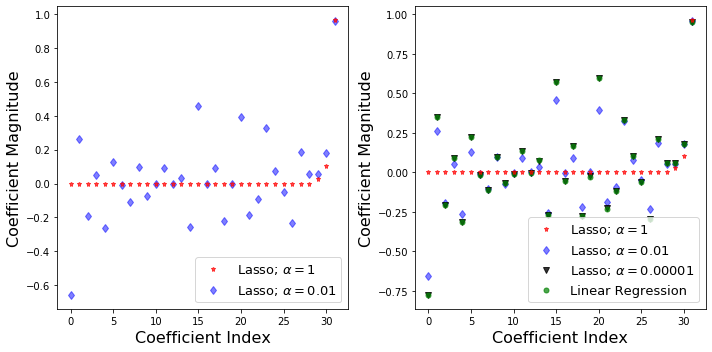

In [7]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used)

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

print("training score for alpha=0.01:", train_score001)
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

print("training score for alpha=0.0001:", train_score00001)
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

print("LR training score:", lr_train_score) 
print("LR test score: ", lr_test_score)
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()